<a href="https://colab.research.google.com/github/WinThant16/UCRHonorsCapstone/blob/main/DataAnalysisAIDecisionMaking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0


In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Path to data file
file_path = '/content/drive/My Drive/Education AI Use/DataToClean.xlsx'

df = pd.read_excel(file_path, header=2)


Mounted at /content/drive


In [ ]:
# Rename the columns
df.rename(columns={
    'Workload': 'HeavyWorkloadAgreement',
    'Workload2': 'StruggleBalancingWorkload',
    'Mentions': 'AIUsageMentionsPeers',
    'ThinkAboutUsing': 'ThinkAboutUsingAI',
    'Usage': 'AIUsageForAssignments',
    'Risk1': 'AIUsageRiskAcademicPenalty',
    'Risk2': 'AIUsageRiskInaccuracyConcern',
    'LikelyToUse': 'LikelyToUseMeetDeadline',
    'Time': 'ImportanceMeetDeadline',
    'Motivation1': 'MotivationDiminishedByAI',
    'current_confidence': 'ConfidenceAIUsage',
    'motivated_learn' : 'MotivatedLearnAI'
}, inplace=True)

# Update list of columns of interest with the new names
columns_of_interest = [
    'HeavyWorkloadAgreement', 'StruggleBalancingWorkload', 'GPAworry',
    'AIUsageMentionsPeers', 'ThinkAboutUsingAI', 'AIUsageForAssignments', 'AIUsageRiskAcademicPenalty', 'AIUsageRiskInaccuracyConcern',
    'LikelyToUseMeetDeadline', 'ImportanceMeetDeadline', 'MotivationDiminishedByAI', 'RiskPreference',
    'TimePreference', 'LossAversion', 'AI_policy', 'AI_ban', 'ConfidenceAIUsage', 'MotivatedLearnAI'
]

# Display the number of rows and columns in the DataFrame
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,race_other,politics,english,firstgen,dadedu,momedu,BornUS,YearsUS#1_1_1,YearsUS#2_1_1,demo_time
0,2024-10-24 13:30:19,2024-10-24 17:36:23,0,66.215.13.83,100,14763,1,2024-10-24 17:36:23,R_3QDgk5FbqtRcfpC,NaN,...,NaN,2.0,3,0.0,5,7,0,NaN,2.0,141.776
1,2024-10-25 14:23:18,2024-10-25 14:59:10,0,66.215.13.83,100,2152,1,2024-10-25 14:59:11,R_6s7ucfyHj8v0hGo,NaN,...,NaN,4.0,3,1.0,2,2,0,NaN,1.0,181.767
2,2024-10-24 16:21:21,2024-10-24 16:35:48,0,66.215.13.83,100,867,1,2024-10-24 16:35:48,R_3erYbXKcLAoDczi,NaN,...,NaN,4.0,2,0.0,5,2,0,NaN,1.0,373.535
3,2024-10-25 22:10:00,2024-10-25 22:18:51,0,172.56.234.113,100,531,1,2024-10-25 22:18:52,R_3BlifvsyffbL6IO,NaN,...,NaN,4.0,3,0.0,2,2,1,NaN,NaN,174.586
4,2024-10-25 10:44:49,2024-10-25 10:59:59,0,47.150.138.48,100,910,1,2024-10-25 10:59:59,R_72lMBnMAEaW8dDH,NaN,...,NaN,6.0,5,1.0,1,2,1,NaN,NaN,95.186


In [ ]:
# Step 4: Flag rows with NaN values in columns of interest
df['NaN_Flag'] = df[columns_of_interest].isnull().any(axis=1).astype(int)

# Step 5: Create DataFrames for complete and flagged data
complete_data_df = df[df['NaN_Flag'] == 0].copy()
flagged_data_df = df[df['NaN_Flag'] == 1].copy()

# Step 6: Calculate descriptive statistics for the complete data
stats_df = complete_data_df[columns_of_interest].describe()

# Include additional statistics: variance, skewness, and kurtosis
stats_df.loc['variance'] = complete_data_df[columns_of_interest].var()
stats_df.loc['skewness'] = complete_data_df[columns_of_interest].skew()
stats_df.loc['kurtosis'] = complete_data_df[columns_of_interest].kurt()

stats_df

,HeavyWorkloadAgreement,StruggleBalancingWorkload,GPAworry,AIUsageMentionsPeers,ThinkAboutUsingAI,AIUsageForAssignments,AIUsageRiskAcademicPenalty,AIUsageRiskInaccuracyConcern,LikelyToUseMeetDeadline,ImportanceMeetDeadline,MotivationDiminishedByAI,RiskPreference,TimePreference,LossAversion,AI_policy,AI_ban,ConfidenceAIUsage,MotivatedLearnAI
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,3.893878,3.465306,3.787755,3.391837,2.759184,2.453061,3.783673,3.236735,3.077551,3.653061,2.897959,2.546939,16.195918,11.620408,3.906122,2.902041,3.114286,3.244898
std,0.842617,1.026204,1.139750,1.025062,0.989270,0.920420,1.140777,1.083160,1.273189,1.047069,0.714169,1.822795,4.304304,1.719819,0.981052,1.263694,0.976780,1.154652
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,14.000000,11.000000,3.000000,2.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,2.000000,16.000000,12.000000,4.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,18.000000,13.000000,5.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,24.000000,14.000000,5.000000,5.000000,5.000000,5.000000
variance,0.710003,1.053095,1.299030,1.050753,0.978655,0.847173,1.301372,1.173235,1.621010,1.096353,0.510037,3.322583,18.527032,2.957779,0.962462,1.596922,0.954098,1.333222
skewness,-0.791199,-0.341714,-0.630281,-0.061846,0.473478,0.631977,-0.635846,-0.209922,-0.182463,-0.411568,-0.392992,0.859448,-0.811477,-1.604919,-0.624298,0.087513,-0.045149,-0.103608


In [ ]:
# Step 5: Filter out rows with `Flag == 1`, `NaN_Flag == 1`, or `LA_flag == 1`
clean_df = df[(df['Flag'] != 1) & (df['NaN_Flag'] != 1) & (df['LA_FLAG'] != 1)].copy()

# Step 6: Calculate the descriptive statistics for the clean dataset
clean_stats_df = clean_df[columns_of_interest].describe()

# Include additional statistics such as variance, skewness, and kurtosis
clean_stats_df.loc['variance'] = clean_df[columns_of_interest].var()
clean_stats_df.loc['skewness'] = clean_df[columns_of_interest].skew()
clean_stats_df.loc['kurtosis'] = clean_df[columns_of_interest].kurt()

# Display the statistics
clean_stats_df


,HeavyWorkloadAgreement,StruggleBalancingWorkload,GPAworry,AIUsageMentionsPeers,ThinkAboutUsingAI,AIUsageForAssignments,AIUsageRiskAcademicPenalty,AIUsageRiskInaccuracyConcern,LikelyToUseMeetDeadline,ImportanceMeetDeadline,MotivationDiminishedByAI,RiskPreference,TimePreference,LossAversion,AI_policy,AI_ban,ConfidenceAIUsage,MotivatedLearnAI
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,3.874317,3.459016,3.775956,3.327869,2.704918,2.360656,3.786885,3.262295,3.049180,3.579235,2.923497,2.546448,16.792350,11.781421,3.907104,2.836066,3.060109,3.180328
std,0.851983,1.025613,1.138280,0.978696,0.960956,0.908436,1.120951,1.041475,1.280791,1.065444,0.606417,1.820752,2.743733,1.466207,0.953365,1.238312,0.920878,1.160355
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,7.000000,2.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,14.000000,11.000000,3.000000,2.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,2.000000,17.000000,12.000000,4.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,18.000000,13.000000,5.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,24.000000,14.000000,5.000000,5.000000,5.000000,5.000000
variance,0.725875,1.051883,1.295682,0.957845,0.923437,0.825257,1.256530,1.084669,1.640425,1.135171,0.367742,3.315138,7.528073,2.149763,0.908905,1.533417,0.848015,1.346424
skewness,-0.726029,-0.274585,-0.679666,-0.058785,0.472530,0.732902,-0.611398,-0.249034,-0.172050,-0.333352,-0.262991,0.882637,0.694206,-0.968511,-0.658742,0.158155,-0.290746,-0.101838


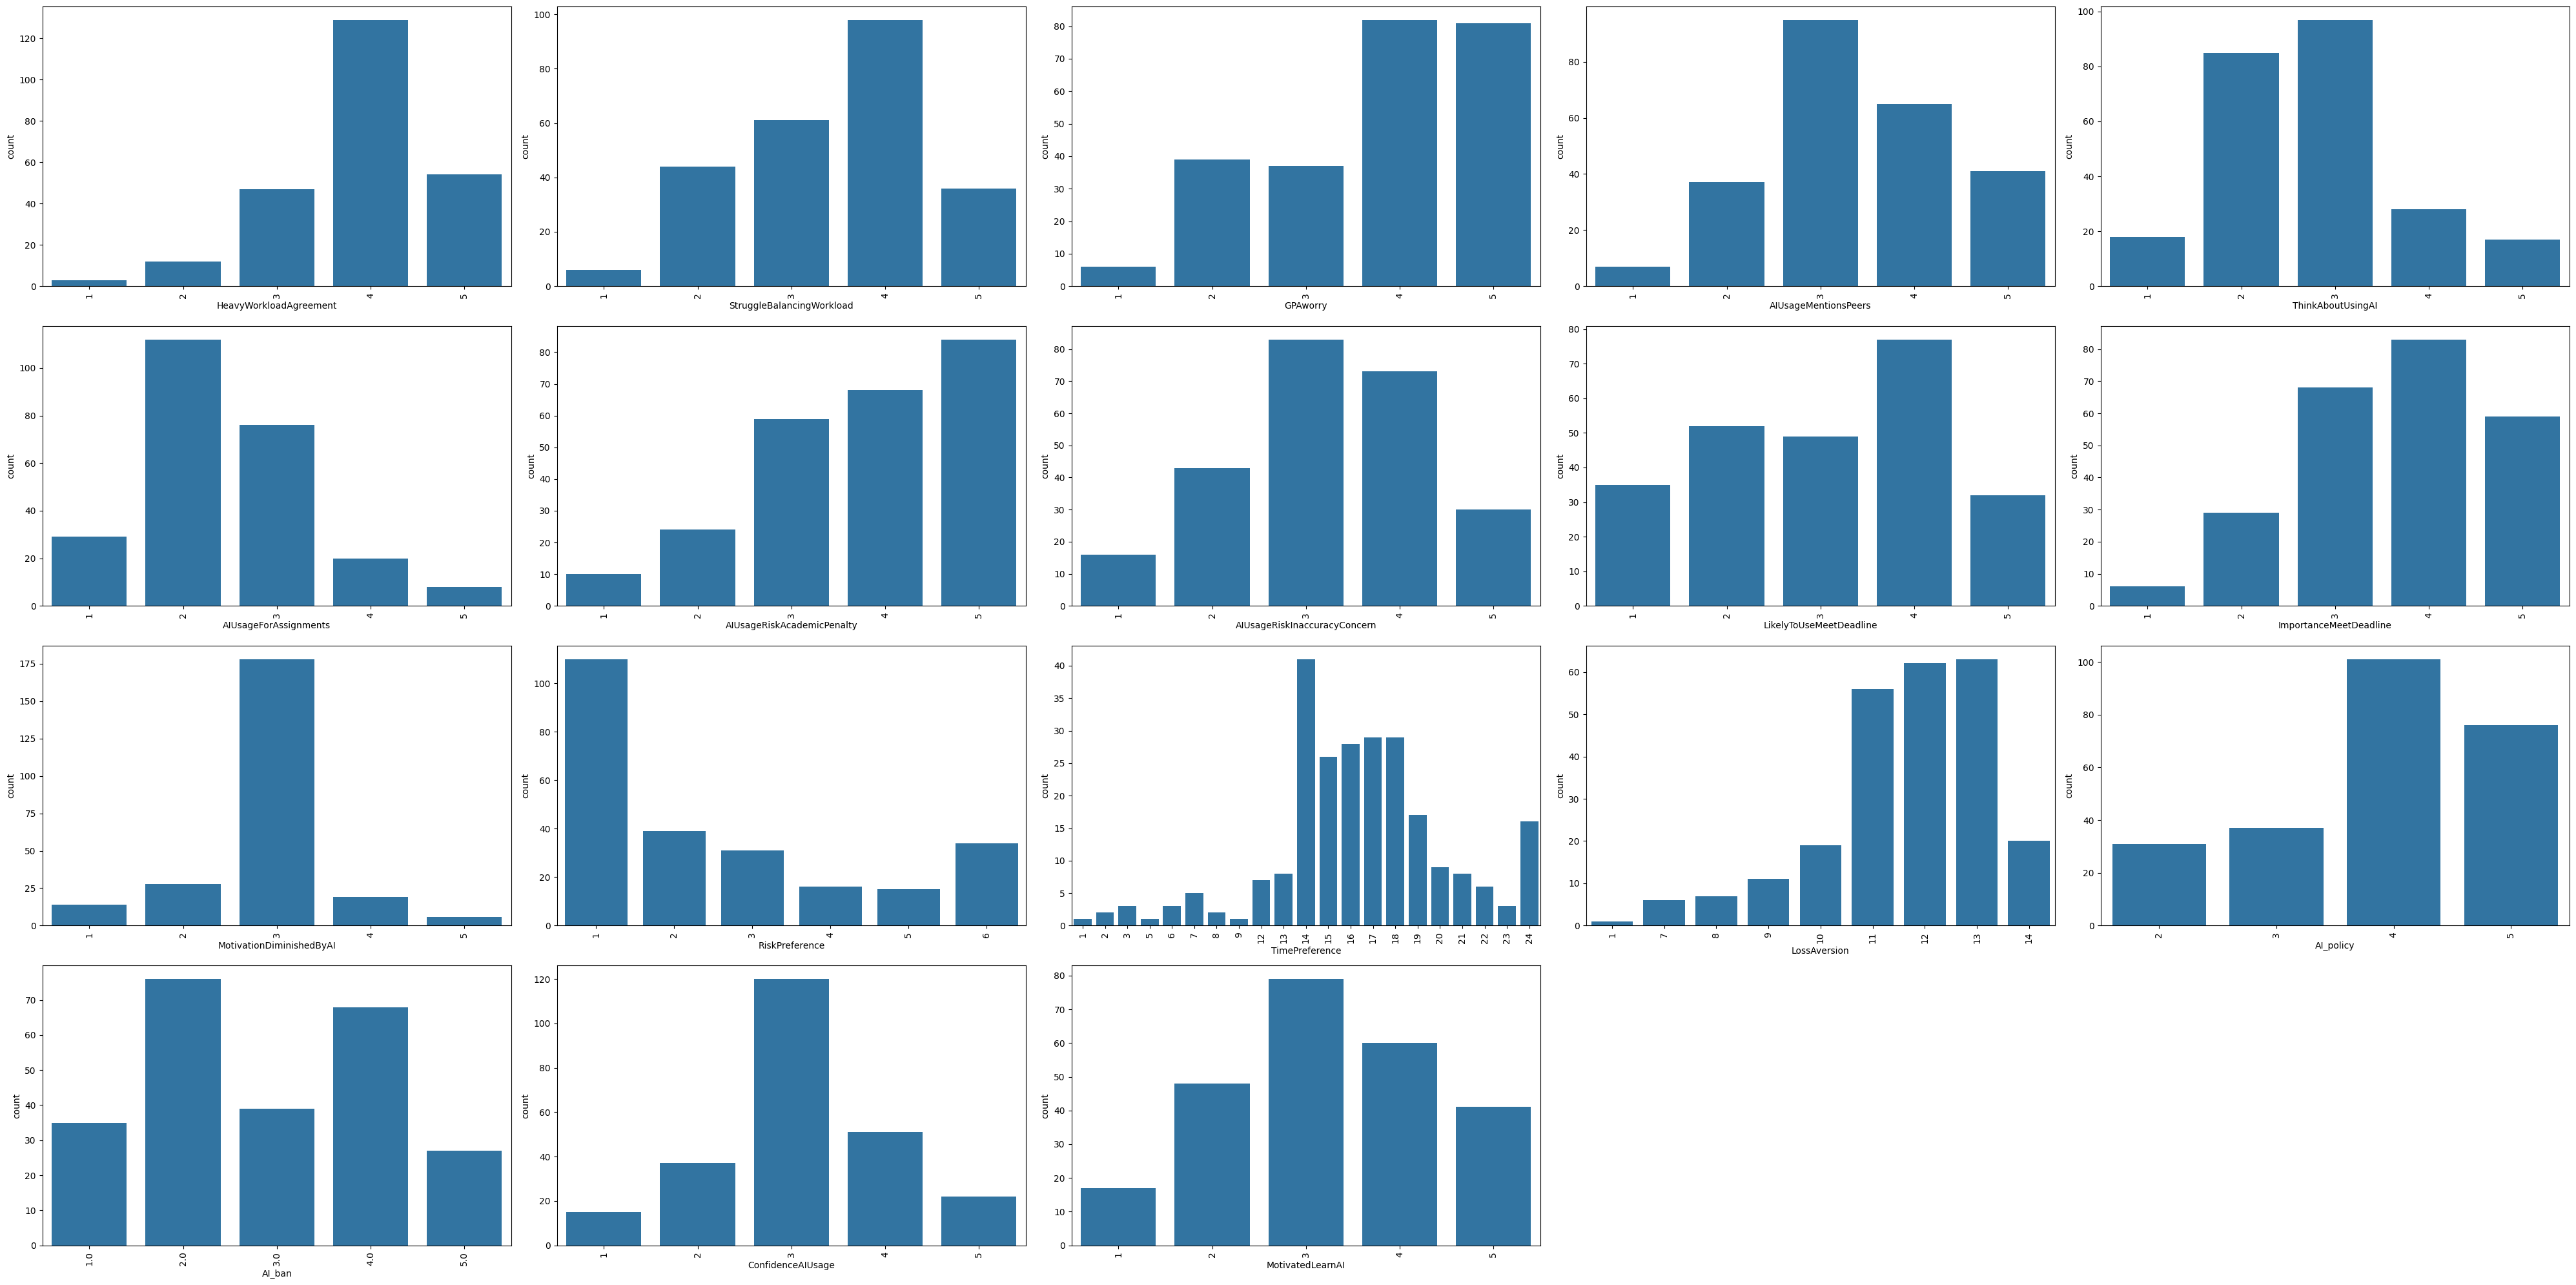

In [ ]:
# Step 7: Visualize the distributions of each variable in the complete dataset
plt.figure(figsize=(40, 20))
for index, column in enumerate(columns_of_interest, 1):
    plt.subplot(4, 5, index)
    sns.countplot(x=complete_data_df[column])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Check rows with Flag == 1
flagged_rows = df[df['Flag'] == 1]
print("Rows flagged with 'Flag == 1':")
print(flagged_rows['AI_policy'].value_counts())

# Check rows with NaN_Flag == 1
nan_flagged_rows = df[df['NaN_Flag'] == 1]
print("Rows flagged with 'NaN_Flag == 1':")
print(nan_flagged_rows['AI_policy'].value_counts())

# Check rows with LA_FLAG == 1
la_flagged_rows = df[df['LA_FLAG'] == 1]
print("Rows flagged with 'LA_FLAG == 1':")
print(la_flagged_rows['AI_policy'].value_counts())


# Print a summary of NaN values in each column
print("NaN values in columns:")
print(df[columns_of_interest].isna().sum())


Rows flagged with 'Flag == 1':
AI_policy
5    23
4    19
3    11
2     9
1     1
Name: count, dtype: int64
Rows flagged with 'NaN_Flag == 1':
AI_policy
1    3
Name: count, dtype: int64
Rows flagged with 'LA_FLAG == 1':
AI_policy
5    1
Name: count, dtype: int64
NaN values in columns:
HeavyWorkloadAgreement          0
StruggleBalancingWorkload       0
GPAworry                        0
AIUsageMentionsPeers            0
ThinkAboutUsingAI               0
AIUsageForAssignments           0
AIUsageRiskAcademicPenalty      0
AIUsageRiskInaccuracyConcern    0
LikelyToUseMeetDeadline         0
ImportanceMeetDeadline          0
MotivationDiminishedByAI        0
RiskPreference                  0
TimePreference                  0
LossAversion                    0
AI_policy                       0
AI_ban                          3
ConfidenceAIUsage               0
MotivatedLearnAI                0
dtype: int64


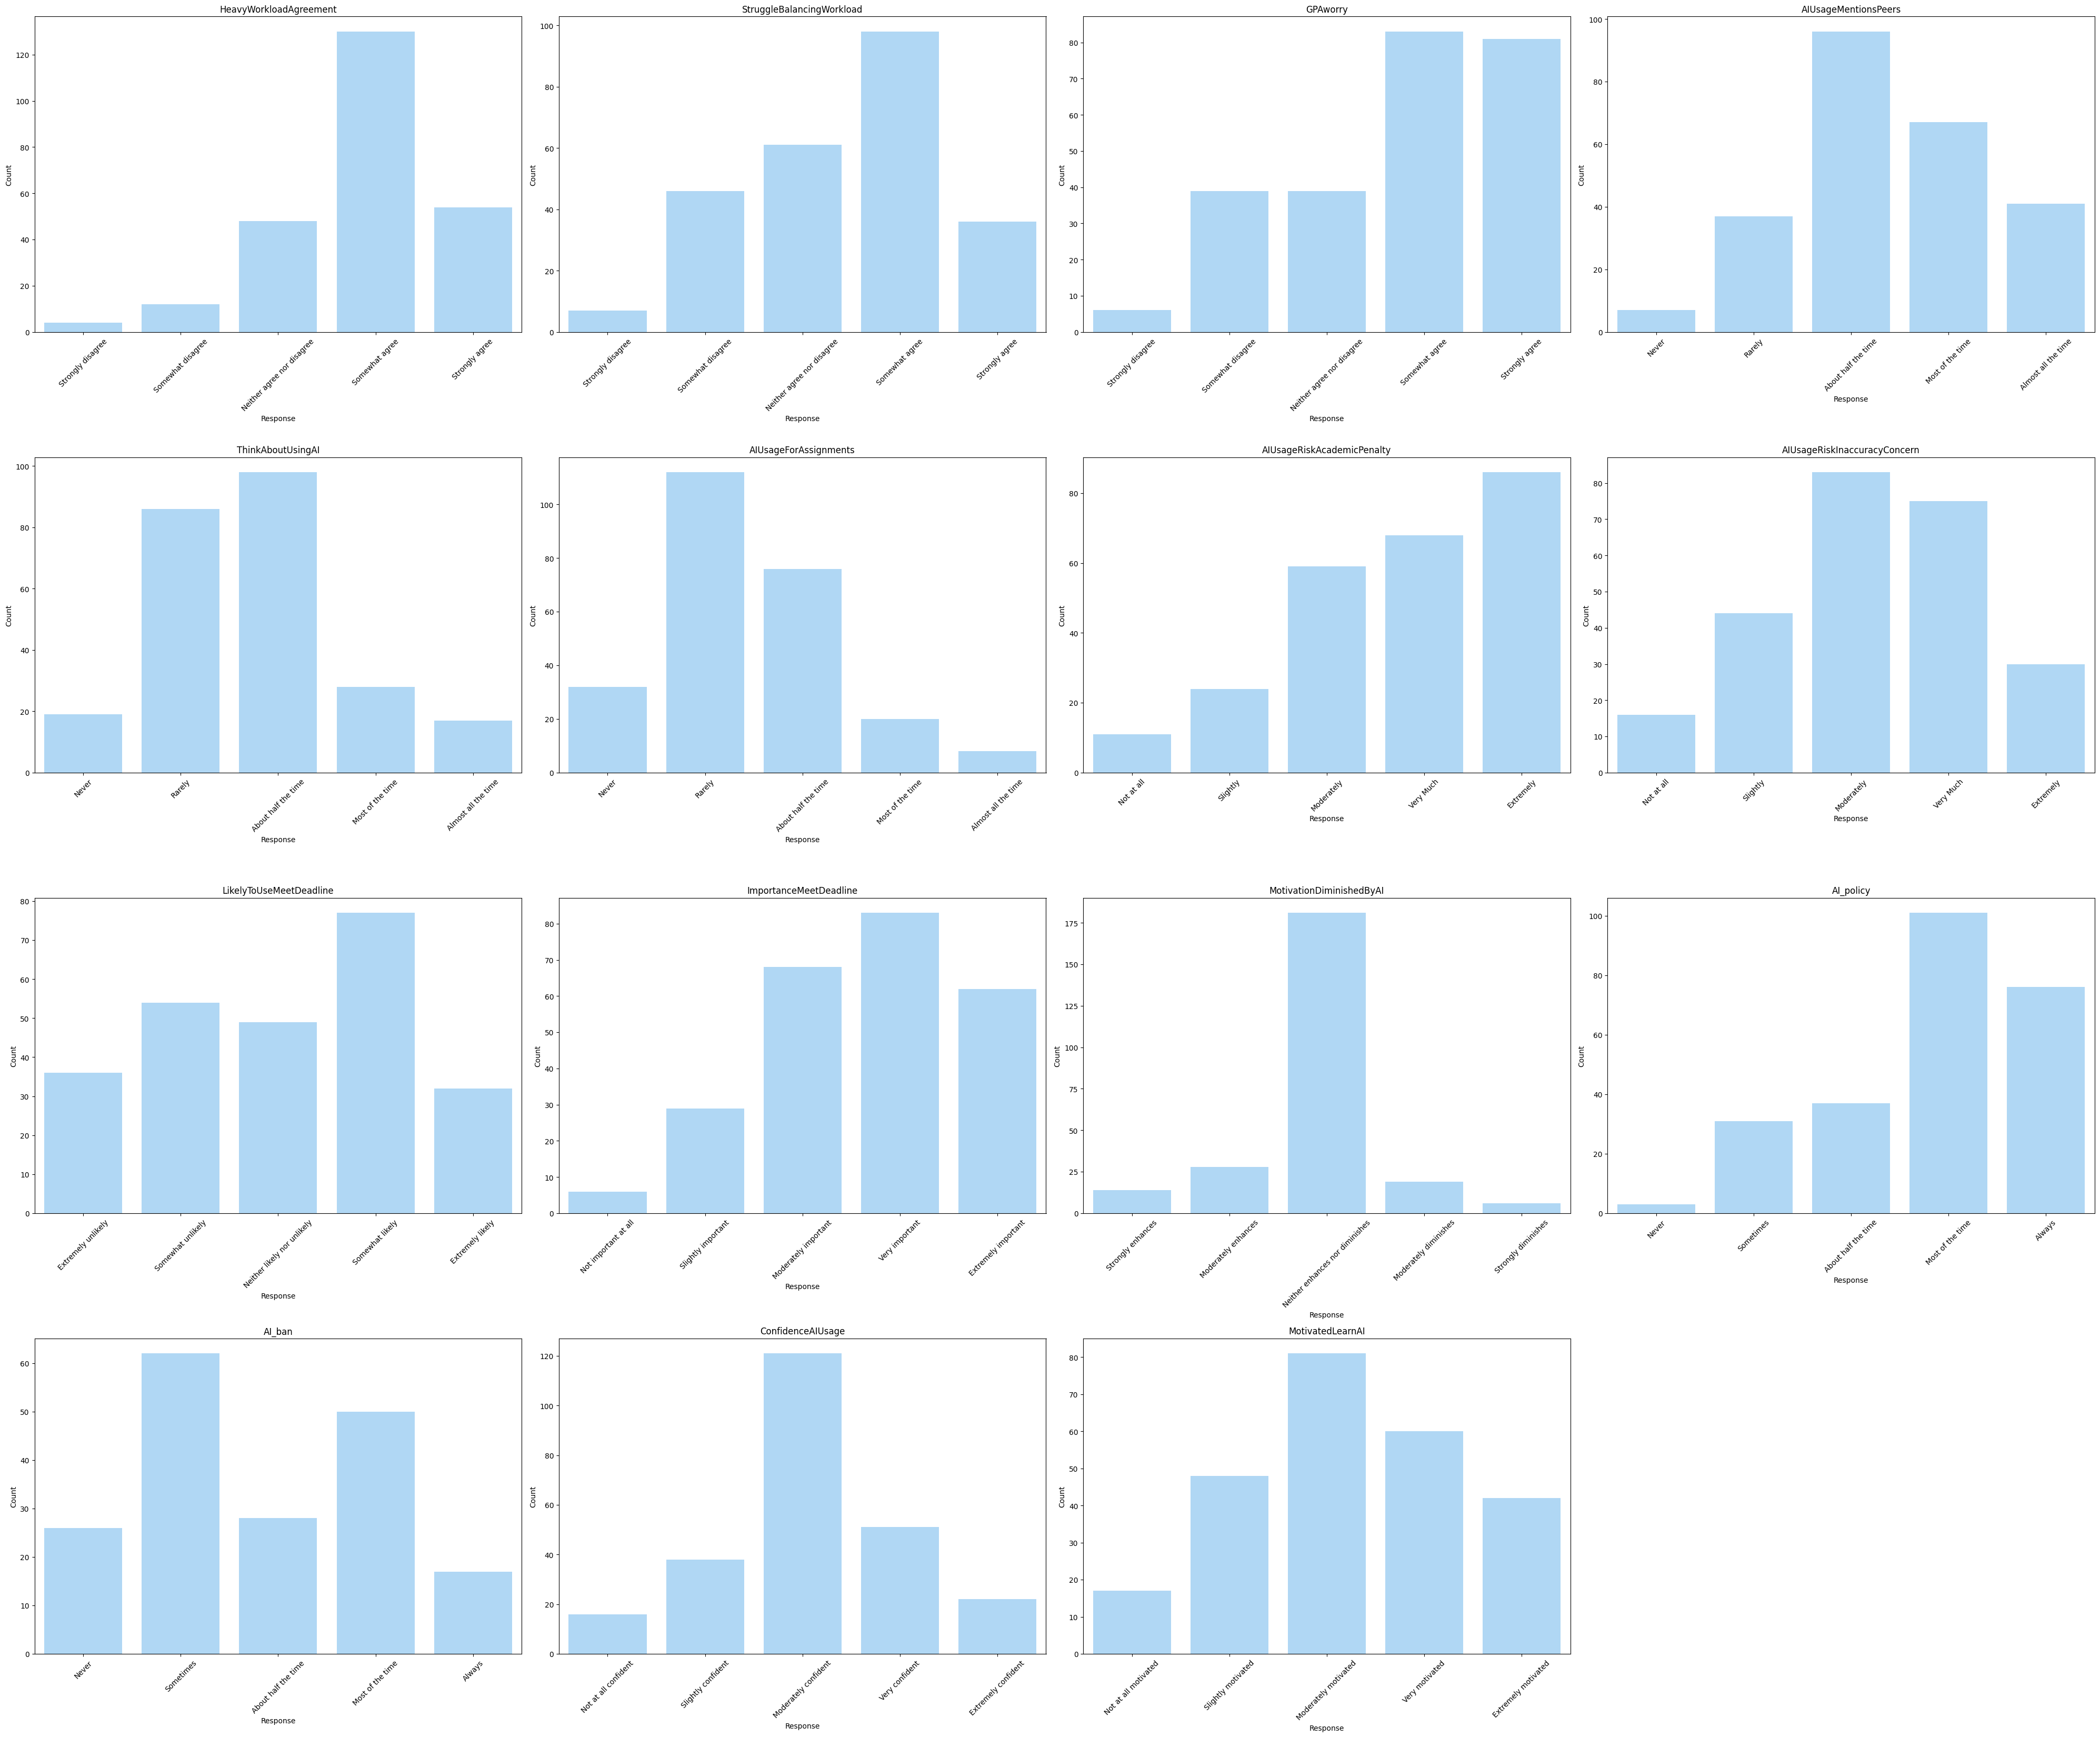

In [ ]:
# specific plots.
# 'HeavyWorkloadAgreement', 'StruggleBalancingWorkload', 'GPAworry',
#     'AIUsageMentionsPeers', 'ThinkAboutUsingAI', 'AIUsageForAssignments', 'AIUsageRiskAcademicPenalty', 'AIUsageRiskInaccuracyConcern',
#     'LikelyToUseMeetDeadline', 'ImportanceMeetDeadline', 'MotivationDiminishedByAI', 'RiskPreference',
#     'TimePreference', 'LossAversion', 'AI_policy', 'AI_ban', 'MotivatedLearnAI'
import matplotlib.cm as cm
import matplotlib.colors as mcolors

mappings = {
    'HeavyWorkloadAgreement': {
        1: 'Strongly disagree',
        2: 'Somewhat disagree',
        3: 'Neither agree nor disagree',
        4: 'Somewhat agree',
        5: 'Strongly agree'
    },
    'StruggleBalancingWorkload': {
        1: 'Strongly disagree',
        2: 'Somewhat disagree',
        3: 'Neither agree nor disagree',
        4: 'Somewhat agree',
        5: 'Strongly agree'
    },
    'GPAworry': {
        1: 'Strongly disagree',
        2: 'Somewhat disagree',
        3: 'Neither agree nor disagree',
        4: 'Somewhat agree',
        5: 'Strongly agree'
    },
    'AIUsageMentionsPeers': {
        1: 'Never',
        2: 'Rarely',
        3: 'About half the time',
        4: 'Most of the time',
        5: 'Almost all the time'
    },
    'ThinkAboutUsingAI': {
        1: 'Never',
        2: 'Rarely',
        3: 'About half the time',
        4: 'Most of the time',
        5: 'Almost all the time'
    },
    'AIUsageForAssignments': {
        1: 'Never',
        2: 'Rarely',
        3: 'About half the time',
        4: 'Most of the time',
        5: 'Almost all the time'
    },
    'AIUsageRiskAcademicPenalty': {
        1: 'Not at all',
        2: 'Slightly',
        3: 'Moderately',
        4: 'Very Much',
        5: 'Extremely'
    },
    'AIUsageRiskInaccuracyConcern': {
        1: 'Not at all',
        2: 'Slightly',
        3: 'Moderately',
        4: 'Very Much',
        5: 'Extremely'
    },
    'LikelyToUseMeetDeadline': {
        1: 'Extremely unlikely',
        2: 'Somewhat unlikely',
        3: 'Neither likely nor unlikely',
        4: 'Somewhat likely',
        5: 'Extremely likely'
    },
    'ImportanceMeetDeadline': {
        1: 'Not important at all',
        2: 'Slightly important',
        3: 'Moderately important',
        4: 'Very important',
        5: 'Extremely important'
    },
    'MotivationDiminishedByAI': {
        1: 'Strongly enhances',
        2: 'Moderately enhances',
        3: 'Neither enhances nor diminishes',
        4: 'Moderately diminishes',
        5: 'Strongly diminishes'
    },
    'AI_policy': {
        1: 'Never',
        2: 'Sometimes',
        3: 'About half the time',
        4: 'Most of the time',
        5: 'Always'
    },
    'AI_ban': {
        1: 'Never',
        2: 'Sometimes',
        3: 'About half the time',
        4: 'Most of the time',
        5: 'Always'
    },
    'ConfidenceAIUsage': {
        1: 'Not at all confident',
        2: 'Slightly confident',
        3: 'Moderately confident',
        4: 'Very confident',
        5: 'Extremely confident'
    },
    'MotivatedLearnAI': {
        1: 'Not at all motivated',
        2: 'Slightly motivated',
        3: 'Moderately motivated',
        4: 'Very motivated',
        5: 'Extremely motivated'
    },
    # Add mappings for all other variables
}

# color palette for plots
custom_palette = ["#00c4ff", "#09a0da", "#006cc3","#0021c3", "#00056b"]  # Red, purple, blue

# Plot for mappable variables
plt.figure(figsize=(40, 40))
mappable_columns = [col for col in mappings.keys() if col not in ['RiskPreference', 'TimePreference', 'LossAversion']]

for index, column in enumerate(mappable_columns, 1):
    # Determine the dataset
    data_to_use = df if column != 'AI_ban' else clean_df

    # Map values to descriptive labels
    labeled_column = f"{column}_Labeled"
    data_to_use[labeled_column] = data_to_use[column].map(mappings[column])

    # Count the values for the variable
    value_counts = data_to_use[labeled_column].value_counts().sort_index()
    labels = list(mappings[column].values())  # Preserve the order from mappings
    counts = [value_counts[label] if label in value_counts else 0 for label in labels]

    # Plot
    plt.subplot(5, 4, index)
    sns.barplot(x=labels, y=counts, color='#a5d9ff')  # Single color for bars
    plt.title(column)
    plt.xlabel("Response")
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-14-dd3a5bd9530f>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gradient_cmap = cm.get_cmap('coolwarm')
<ipython-input-14-dd3a5bd9530f>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gradient_cmap_reverse = cm.get_cmap('coolwarm_r')
<ipython-input-14-dd3a5bd9530f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette=colors)
<ipython-input-14-dd3a5bd9530f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

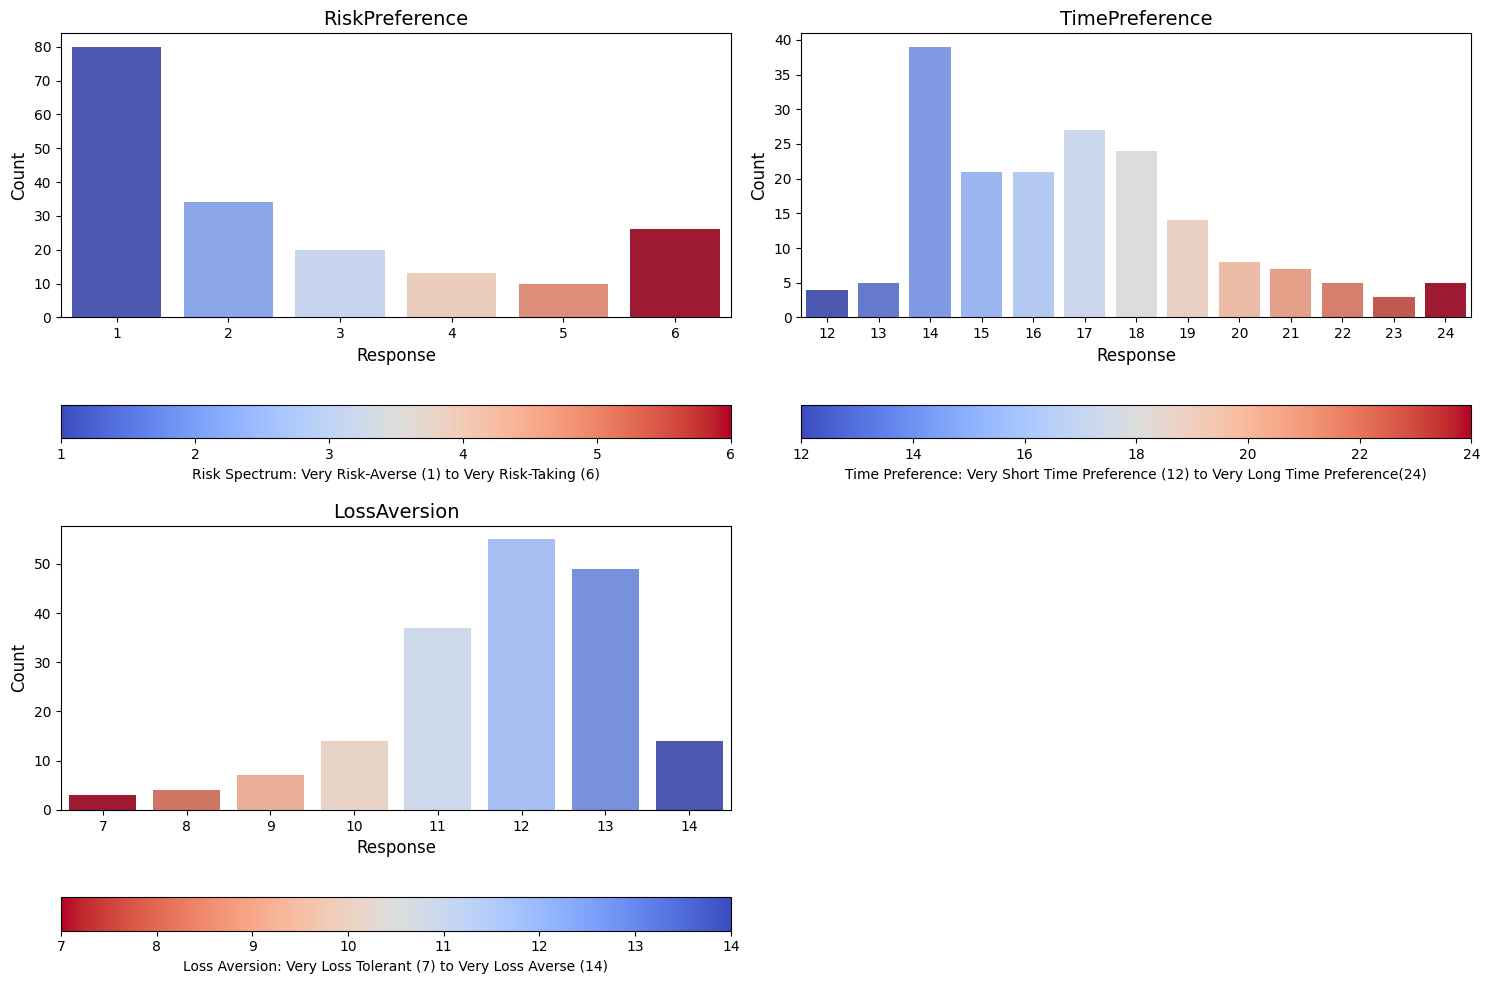

In [ ]:
# Define gradient colormap and labels for DMP variables
gradient_cmap = cm.get_cmap('coolwarm')
gradient_cmap_reverse = cm.get_cmap('coolwarm_r')
dmp_columns = ['RiskPreference', 'TimePreference', 'LossAversion']
dmp_labels = {
    'RiskPreference': 'Risk Spectrum: Very Risk-Averse (1) to Very Risk-Taking (6)',
    'TimePreference': 'Time Preference: Very Short Time Preference (12) to Very Long Time Preference(24)',
    'LossAversion': 'Loss Aversion: Very Loss Tolerant (7) to Very Loss Averse (14)'
}

plt.figure(figsize=(15, 10))
for index, column in enumerate(dmp_columns, 1):
    # Count raw values
    value_counts = clean_df[column].value_counts().sort_index()
    labels = value_counts.index
    counts = value_counts.values

    # Create gradient colors
    if column == 'LossAversion':
        # Flip the gradient for LossAversion
        norm = mcolors.Normalize(vmin=min(labels), vmax=max(labels))
        colors = [mcolors.rgb2hex(gradient_cmap(norm(value))) for value in labels[::-1]]
    else:
        # Standard gradient for other columns
        norm = mcolors.Normalize(vmin=min(labels), vmax=max(labels))
        colors = [mcolors.rgb2hex(gradient_cmap(norm(value))) for value in labels]

    # Plot with gradient colors
    plt.subplot(2, 2, index)
    sns.barplot(x=labels, y=counts, palette=colors)
    plt.title(column, fontsize=14)
    plt.xlabel("Response", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=0, ha='center', fontsize=10)  # Align labels horizontally

    # Add a legend for the gradient at the bottom
    sm = cm.ScalarMappable(cmap=gradient_cmap, norm=norm)
    sm_reverse = cm.ScalarMappable(cmap=gradient_cmap_reverse, norm=norm)
    sm.set_array([])

    if column == 'LossAversion':
        # Set custom tick labels for LossAversion
        # Removed the `reverse=True` argument
        cbar = plt.colorbar(sm_reverse, ax=plt.gca(), orientation='horizontal', pad=0.2)
        cbar.set_label(dmp_labels[column], fontsize=10)
        # Invert the colorbar axis to reverse the colors
        cbar.ax.set_xticklabels(['7', '8', '9', '10', '11', '12', '13', '14'])

        # cbar.ax.invert_xaxis()

    else:
        # Standard legend for other columns
        cbar = plt.colorbar(sm, ax=plt.gca(), orientation='horizontal', pad=0.2)
        cbar.set_label(dmp_labels[column], fontsize=10)

plt.tight_layout()
plt.show()

# CORRELATION MATRICES

In [ ]:

# Compute correlation matrix for the full dataset
corr_full = df[columns_of_interest].corr()

# Compute correlation matrix for the cleaned dataset
corr_clean = clean_df[columns_of_interest].corr()


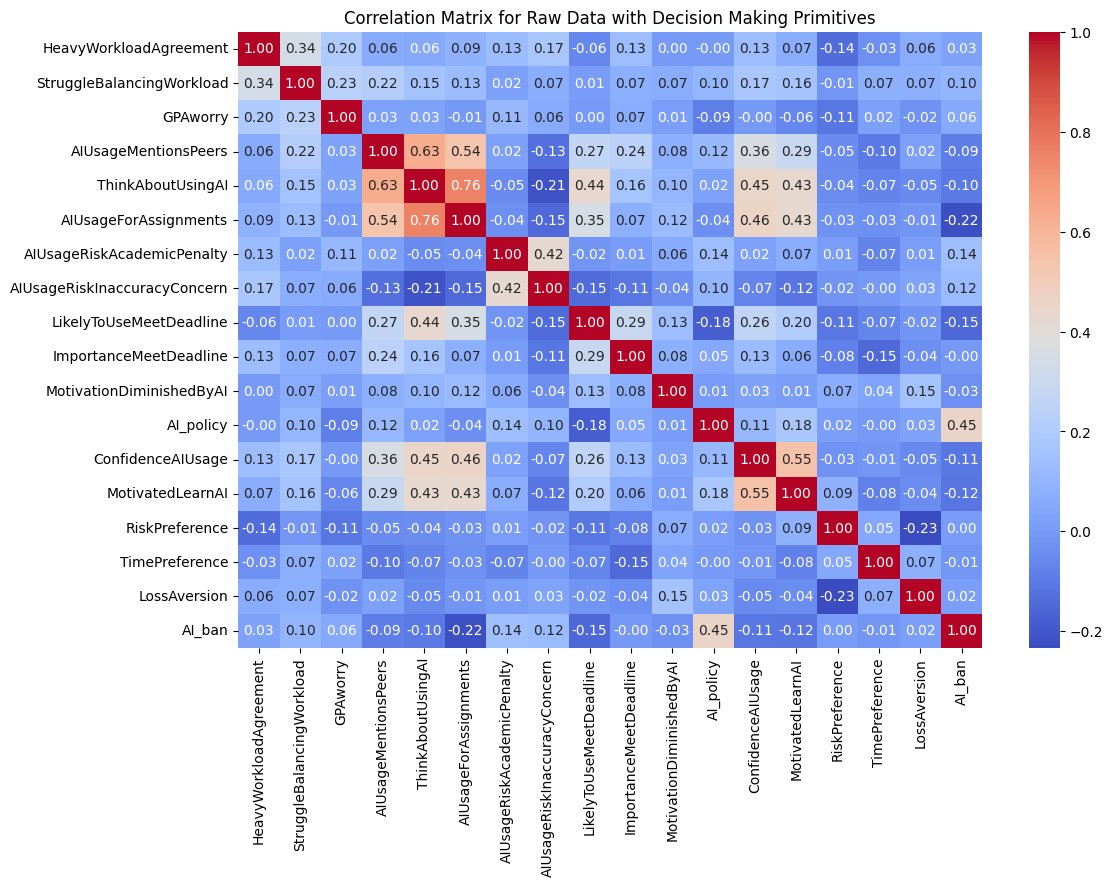

In [ ]:
# Step 1: Identify Non-DMP and DMP columns within columns_of_interest
non_dmp_columns = [col for col in columns_of_interest if col not in ['AI_ban', 'RiskPreference', 'TimePreference', 'LossAversion' ]]
dmp_columns = [col for col in columns_of_interest if col in ['AI_ban', 'RiskPreference', 'TimePreference', 'LossAversion']]

# Step 2: Align indices and select only columns_of_interest
aligned_df = df.loc[clean_df.index, non_dmp_columns]
aligned_dmp_df = clean_df.loc[clean_df.index, dmp_columns]

# Step 3: Combine datasets
combined_df = pd.concat([aligned_df, aligned_dmp_df], axis=1)

# Step 4: Calculate correlation matrix for columns_of_interest
# Convert columns to numeric, errors='coerce' will replace non-numeric values with NaN
for col in combined_df.columns:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

correlation_matrix = combined_df.corr()

# Step 5: Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix for Raw Data with Decision Making Primitives")
plt.show()

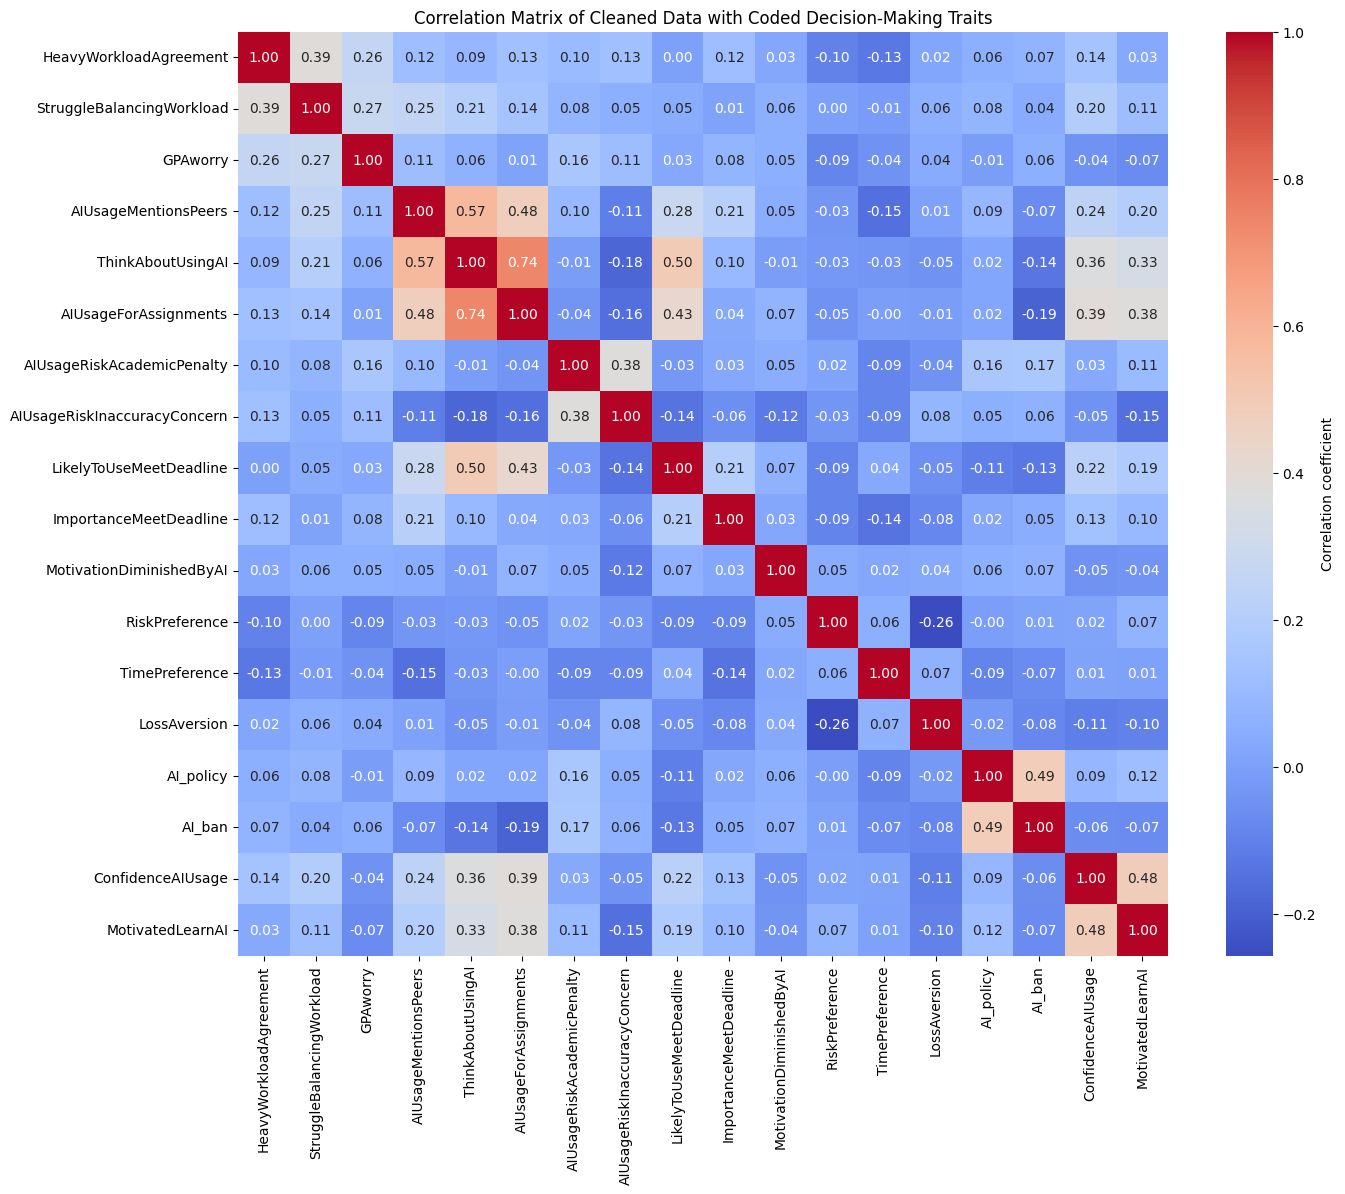

In [ ]:
corr_matrix = df[columns_of_interest].corr()

# Visualize
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix of Cleaned Data with Coded Decision-Making Traits')
plt.show()

In [ ]:
# Data Preparation and Coding Decision-Making Traits
# Clean data
clean_df = df[(df['Flag'] != 1) & (df['NaN_Flag'] != 1) & (df['LA_FLAG'] != 1)].copy()

# Coding decision-making traits
clean_df['RiskPreference_Coded'] = clean_df['RiskPreference'].apply(
    lambda x: 0 if x <= 3 else 1 if x >= 4 else np.nan
)
clean_df['TimePreference_Coded'] = clean_df['TimePreference'].apply(
    lambda x: 1 if x > 18 else 0 if x < 18 else np.nan
)
clean_df['LossAversion_Coded'] = clean_df['LossAversion'].apply(
    lambda x: 0 if x <= 10 else 1 if x >= 11 else np.nan
)

# Code binary DVs
clean_df['LikelyToUseMeetDeadline_Binary'] = clean_df['LikelyToUseMeetDeadline'].apply(
    lambda x: 1 if x >= 4 else 0
)



### Differentiating the Three Dependent Variables (DVs)

#### 1. AIUsageForAssignments
- **Definition**: Measures the frequency of actual AI usage specifically for assignments.
- **Focus**:
  - Captures a **behavioral aspect** of AI adoption in academic tasks.
  - Reflects **what students actually do** regarding AI use for coursework.
- **Reason for Selection**:
  - It is the most **direct measure of AI behavior** in academic settings.
  - Helps analyze which factors influence actual adoption, such as stress, policies, or risk perceptions.
- **Use in Models**:
  - For studying behavioral drivers like workload, instructor policies, and decision-making traits.

```
# Example model for AIUsageForAssignments:
formula = "AIUsageForAssignments ~ HeavyWorkloadAgreement + AI_policy + RiskPreference"
model = sm.OLS.from_formula(formula, data=clean_df).fit()
print(model.summary())
```


#### 2. ThinkAboutUsingAI
- **Definition**: Reflects students’ contemplation or consideration of using AI.
- **Focus**:
  - Highlights the **attitudinal aspect** of AI adoption.
  - Measures **interest, curiosity, or openness** toward AI rather than concrete actions.
- **Reason for Selection**:
  - Helps understand the **precursors to AI adoption behavior**.
  - Identifies whether certain students are predisposed to consider AI based on stress, policies, or other traits.
- **Use in Models**:
  - For analyzing attitudes and psychological predictors such as motivation, risk perceptions, or academic stress.

```
# Example model for ThinkAboutUsingAI:
formula = "ThinkAboutUsingAI ~ MotivationDiminishedByAI + AI_policy + TimePreference"
model = sm.OLS.from_formula(formula, data=clean_df).fit()
print(model.summary())
```

#### 3. LikelyToUseMeetDeadline
- **Definition**: Indicates the likelihood of students using AI as a coping mechanism to meet deadlines.
- **Focus**:
  - Captures a **situational and behavioral intention** aspect of AI use.
  - Reflects whether students perceive AI as a valuable tool in specific, high-pressure scenarios.
- **Reason for Selection**:
  - Helps bridge the gap between attitudes (e.g., thinking about AI) and actual behavior (e.g., AI usage for assignments).
  - Highlights the **role of urgency and decision-making** in driving AI adoption.
- **Use in Models**:
  - For studying the interplay between stress, decision-making traits, and situational pressures like deadlines.

```
# Example model for LikelyToUseMeetDeadline:
formula = "LikelyToUseMeetDeadline ~ StruggleBalancingWorkload + RiskPreference + LossAversion"
model = sm.Logit.from_formula(formula, data=clean_df).fit()
print(model.summary())
```

### Rationale for Selecting These DVs
- These DVs were chosen to capture distinct but related aspects of AI adoption:
  - **Behavioral (AIUsageForAssignments)**: What students do.
  - **Attitudinal (ThinkAboutUsingAI)**: What students think or feel.
  - **Situational/Intentional (LikelyToUseMeetDeadline)**: What students might do under specific circumstances.
- By analyzing these DVs together, we can better understand the **complex interplay between attitudes, behaviors, and situational factors** influencing AI usage.

# PERFORM LOGISTIC REGRESSION

# **Hypotheses and Models for AI Usage Study**

## **Overview**
This study examines the factors influencing students' AI usage behavior, focusing on assignments, meeting deadlines, and general contemplation about AI. The analysis incorporates three key dependent variables (DVs) and their associated independent variables (IVs) across distinct models.

---

## **Dependent Variables (DVs)**
1. **`AIUsageForAssignments`**: Measures the self-reported frequency of AI usage for assignments (Likert scale).
2. **`LikelyToUseMeetDeadline`**: Captures the likelihood of using AI to meet deadlines (binary-coded or Likert scale).
3. **`ThinkAboutUsingAI`**: Indicates contemplation about AI usage, reflecting interest or acceptance.

Each DV is analyzed independently to understand how different predictors affect them.

---

## **Models and Hypotheses**

### **1. Stress and Workload Model**
- **Hypothesis**:
  - Higher stress and workload levels are associated with:
    - Increased AI usage for assignments (`AIUsageForAssignments`).
    - Greater contemplation about AI usage (`ThinkAboutUsingAI`).
    - A higher likelihood of using AI to meet deadlines (`LikelyToUseMeetDeadline`).
- **Independent Variables**:
  - `HeavyWorkloadAgreement`: Perceived workload intensity.
  - `StruggleBalancingWorkload`: Difficulty balancing workload.
  - `GPAworry`: Concern about academic performance as a proxy for stress.

---

### **2. Policy Model**
- **Hypothesis**:
  - The presence of AI policies (`AI_policy`) and bans (`AI_ban`):
    - Reduces AI usage for assignments.
    - Decreases contemplation about AI usage.
    - Lowers the likelihood of using AI to meet deadlines.
- **Independent Variables**:
  - `AI_policy`: Mentions of AI policies in syllabi.
  - `AI_ban`: Presence of explicit AI bans.

---

### **3. Risk Perceptions Model**
- **Hypothesis**:
  - Risk perceptions associated with AI usage, such as:
    - Fear of academic penalties (`AIUsageRiskAcademicPenalty`).
    - Concerns about AI inaccuracies (`AIUsageRiskInaccuracyConcern`).
  - Influence AI usage, contemplation, and likelihood of using AI.
- **Independent Variables**:
  - `AIUsageRiskAcademicPenalty`
  - `AIUsageRiskInaccuracyConcern`

---

### **4. Decision-Making Traits Model**
- **Hypothesis**:
  - Decision-making traits are associated with AI usage behavior, contemplation, and likelihood of using AI.
- **Independent Variables**:
  - **Raw Decision-Making Traits**:
    - `RiskPreference`
    - `TimePreference`
    - `LossAversion`
  - **Coded Decision-Making Traits**:
    - `RiskPreference_Coded`
    - `TimePreference_Coded`
    - `LossAversion_Coded`

---

### **5. Motivation Model**

- **Hypotheses**  
  1. Students with higher motivation to attend classes are **less likely** to use AI as a replacement for effort in assignments.  
  2. Students motivated to learn about AI are **more likely** to use it as an educational opportunity or productivity tool.  
  3. Students with higher confidence in their ability to use AI tools are **more likely** to integrate AI into their academic workflow effectively.

- **Independent Variables (IVs)**  
  - **MotivationDiminishedByAI**: Reflects students' engagement and commitment to academic activities.  
  - **MotivatedLearnAI**: Captures students' interest in and drive to learn about AI effectively.  
  - **ConfidenceAIUsage**: Measures students' self-assessed ability to use AI tools, reflecting perceived competence and preparedness to leverage these tools.  


---

### **6. Combined Stress and Policy Model**
- **Hypothesis**:
  - Stress and workload factors combined with instructor policies:
    - Influence AI usage for assignments.
    - Impact contemplation about AI usage.
    - Affect the likelihood of using AI to meet deadlines.
- **Independent Variables**:
  - **Stress/Workload Factors**:
    - `HeavyWorkloadAgreement`
    - `StruggleBalancingWorkload`
    - `GPAworry`
  - **Policy Factors**:
    - `AI_policy`
    - `AI_ban`

---

### **7. Interaction Models**
- **Stress × Policy Interaction**:
  - Hypothesis: The impact of stress on AI usage is moderated by the presence of AI policies and bans.
  - Interaction Terms:
    - `HeavyWorkloadAgreement * AI_policy`
    - `StruggleBalancingWorkload * AI_ban`

- **Decision-Making × Risk Perceptions Interaction**:
  - Hypothesis: The influence of decision-making traits on AI usage is moderated by risk perceptions.
  - Interaction Terms:
    - `RiskPreference * AIUsageRiskAcademicPenalty`
    - `TimePreference * AIUsageRiskInaccuracyConcern`

---

## **Analysis Plan**
1. **Single IV Regression**:
   - Test each IV independently to identify significant predictors for each DV.
2. **Multiple Regression**:
   - Build separate models for each hypothesis and analyze all three DVs.
3. **Combined Models**:
   - Test combined IVs across hypotheses (e.g., Stress + Policy).
4. **Interaction Models**:
   - Investigate the moderating effects of interactions (e.g., Stress × Policy).


# Regression Models

Stress and Workload Model

In [ ]:
# #### 1. Stress Model Multiple Regression
# stress_ivs = ['HeavyWorkloadAgreement', 'StruggleBalancingWorkload', 'GPAworry']

# # Loop through all DVs for the Stress Model
# print("\n### Stress and Workload Model ###")
# for dv in ['AIUsageForAssignments', 'LikelyToUseMeetDeadline', 'ThinkAboutUsingAI']:
#     formula = f"{dv} ~ {' + '.join(stress_ivs)}"
#     model = sm.OLS.from_formula(formula, data=df).fit()
#     print(f"\nDependent Variable: {dv}")
#     print(model.summary())

import statsmodels.formula.api as smf  # Import statsmodels.formula.api and alias as smf

stress_ivs = ['HeavyWorkloadAgreement', 'StruggleBalancingWorkload', 'GPAworry']

# Loop through all DVs for the Stress Model
print("\n### Stress and Workload Model ###")
for dv in ['AIUsageForAssignments', 'LikelyToUseMeetDeadline', 'ThinkAboutUsingAI']:
    formula = f"{dv} ~ {' + '.join(stress_ivs)}"
    model = smf.ols(formula=formula, data=df).fit()
    print(f"\nDependent Variable: {dv}")
    print(model.summary())


### Stress and Workload Model ###

Dependent Variable: AIUsageForAssignments
                              OLS Regression Results                             
Dep. Variable:     AIUsageForAssignments   R-squared:                       0.028
Model:                               OLS   Adj. R-squared:                  0.016
Method:                    Least Squares   F-statistic:                     2.358
Date:                   Thu, 21 Nov 2024   Prob (F-statistic):             0.0723
Time:                           11:12:18   Log-Likelihood:                -329.47
No. Observations:                    248   AIC:                             666.9
Df Residuals:                        244   BIC:                             681.0
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------

<ipython-input-23-e1b6dee1b47c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ConfidenceAIUsage', y='AIUsageForAssignments', data=clean_df, palette="Blues")


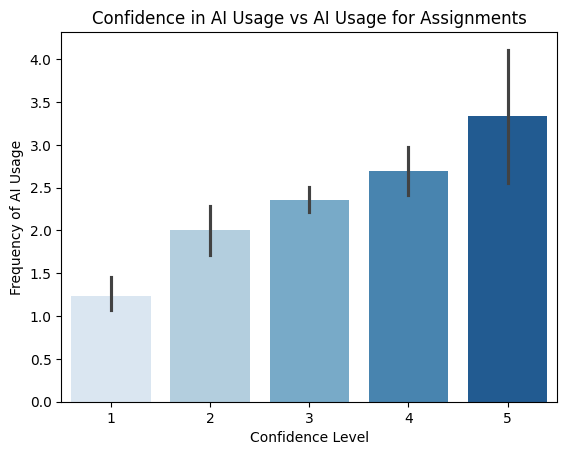

In [ ]:
sns.barplot(x='ConfidenceAIUsage', y='AIUsageForAssignments', data=clean_df, palette="Blues")
plt.title("Confidence in AI Usage vs AI Usage for Assignments")
plt.xlabel("Confidence Level")
plt.ylabel("Frequency of AI Usage")
plt.show()


Instructor Policy Model

In [ ]:
# 2. Policy Model
# OLS Regression

import statsmodels.formula.api as smf  # Import statsmodels.formula.api and alias as smf
policy_ivs = ['AI_policy', 'AI_ban']

print("\n### Policy Model ###")
for dv in ['AIUsageForAssignments', 'LikelyToUseMeetDeadline', 'ThinkAboutUsingAI']:
    formula = f"{dv} ~ {' + '.join(policy_ivs)}"
    model = smf.ols(formula=formula, data=df).fit()
    print(f"\nDependent Variable: {dv}")
    print(model.summary())


### Policy Model ###

Dependent Variable: AIUsageForAssignments
                              OLS Regression Results                             
Dep. Variable:     AIUsageForAssignments   R-squared:                       0.041
Model:                               OLS   Adj. R-squared:                  0.033
Method:                    Least Squares   F-statistic:                     5.161
Date:                   Thu, 21 Nov 2024   Prob (F-statistic):            0.00639
Time:                           07:22:17   Log-Likelihood:                -321.71
No. Observations:                    245   AIC:                             649.4
Df Residuals:                        242   BIC:                             659.9
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Risk Penalty and Inaccuracy

In [ ]:
# 3. **Risk Perceptions Model**
import statsmodels.formula.api as smf  # Import statsmodels.formula.api and alias as smf
risk_ivs = ['AIUsageRiskAcademicPenalty', 'AIUsageRiskInaccuracyConcern']

print("\n### Risk Perceptions Model ###")
for dv in ['AIUsageForAssignments', 'LikelyToUseMeetDeadline', 'ThinkAboutUsingAI']:
    formula = f"{dv} ~ {' + '.join(risk_ivs)}"
    model = smf.ols(formula=formula, data=df).fit()
    print(f"\nDependent Variable: {dv}")
    print(model.summary())


### Risk Perceptions Model ###

Dependent Variable: AIUsageForAssignments
                              OLS Regression Results                             
Dep. Variable:     AIUsageForAssignments   R-squared:                       0.025
Model:                               OLS   Adj. R-squared:                  0.017
Method:                    Least Squares   F-statistic:                     3.112
Date:                   Thu, 21 Nov 2024   Prob (F-statistic):             0.0463
Time:                           07:22:17   Log-Likelihood:                -329.90
No. Observations:                    248   AIC:                             665.8
Df Residuals:                        245   BIC:                             676.3
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------

Decision Making Traits Model

In [ ]:
# 4. **Decision-Making Traits Model**
decision_ivs_coded = ['RiskPreference_Coded', 'TimePreference_Coded', 'LossAversion_Coded']
decision_ivs_raw = ['RiskPreference', 'TimePreference', 'LossAversion']

# Decision-Making Model with coded traits
# print("\n### Decision-Making Traits Model (Coded) ###")
# for dv in ['AIUsageForAssignments', 'LikelyToUseMeetDeadline', 'ThinkAboutUsingAI']:
#     formula = f"{dv} ~ {' + '.join(decision_ivs_coded)}"
#     model = smf.ols(formula=formula, data=clean_df).fit()
#     print(f"\nDependent Variable: {dv}")
#     print(model.summary())

# Decision-Making Model with raw traits
print("\n### Decision-Making Traits Model (Raw) ###")
for dv in ['AIUsageForAssignments', 'LikelyToUseMeetDeadline', 'ThinkAboutUsingAI']:
    formula = f"{dv} ~ {' + '.join(decision_ivs_raw)}"
    model = smf.ols(formula=formula, data=clean_df).fit()
    print(f"\nDependent Variable: {dv}")
    print(model.summary())



### Decision-Making Traits Model (Raw) ###

Dependent Variable: AIUsageForAssignments
                              OLS Regression Results                             
Dep. Variable:     AIUsageForAssignments   R-squared:                       0.002
Model:                               OLS   Adj. R-squared:                 -0.014
Method:                    Least Squares   F-statistic:                    0.1398
Date:                   Thu, 21 Nov 2024   Prob (F-statistic):              0.936
Time:                           07:22:17   Log-Likelihood:                -241.38
No. Observations:                    183   AIC:                             490.8
Df Residuals:                        179   BIC:                             503.6
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------

Motivation Model

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with only the predictors
predictors = clean_df[['MotivationDiminishedByAI', 'ConfidenceAIUsage']]
vif = pd.DataFrame()
vif["Variable"] = predictors.columns
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
print(vif)


                   Variable       VIF
0  MotivationDiminishedByAI  8.531615
1         ConfidenceAIUsage  8.531615


In [ ]:
# 5. Motivation Model

# IVs for Motivation Model
motivation_ivs = ['MotivationDiminishedByAI', 'MotivatedLearnAI', 'ConfidenceAIUsage']

# Iterate over DVs
print("\n### Motivation Model ###")
for dv in ['AIUsageForAssignments', 'LikelyToUseMeetDeadline', 'ThinkAboutUsingAI']:
    formula = f"{dv} ~ {' + '.join(motivation_ivs)}"
    model = smf.ols(formula=formula, data=clean_df).fit()
    print(f"\nDependent Variable: {dv}")
    print(model.summary())



### Motivation Model ###

Dependent Variable: AIUsageForAssignments
                              OLS Regression Results                             
Dep. Variable:     AIUsageForAssignments   R-squared:                       0.267
Model:                               OLS   Adj. R-squared:                  0.255
Method:                    Least Squares   F-statistic:                     21.75
Date:                   Thu, 21 Nov 2024   Prob (F-statistic):           4.68e-12
Time:                           07:22:40   Log-Likelihood:                -213.15
No. Observations:                    183   AIC:                             434.3
Df Residuals:                        179   BIC:                             447.1
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------

Feel free to stop here, combined models are just me testing out a few things.

# **Combined Models**
- These models consider each variable's **main effect** only, without accounting for how one variable might modify the other's influence.



In [ ]:
# 6. **Combined Stress and Policy Model**
combined_ivs = stress_ivs + policy_ivs + motivation_ivs

print("\n### Combined Stress and Policy Model ###")
for dv in ['AIUsageForAssignments', 'LikelyToUseMeetDeadline', 'ThinkAboutUsingAI']:
    formula = f"{dv} ~ {' + '.join(combined_ivs)}"
    model = sm.OLS.from_formula(formula, data=clean_df).fit()
    print(f"\nDependent Variable: {dv}")
    print(model.summary())


### Combined Stress and Policy Model ###

Dependent Variable: AIUsageForAssignments
                              OLS Regression Results                             
Dep. Variable:     AIUsageForAssignments   R-squared:                       0.601
Model:                               OLS   Adj. R-squared:                  0.585
Method:                    Least Squares   F-statistic:                     37.71
Date:                   Mon, 18 Nov 2024   Prob (F-statistic):           7.27e-32
Time:                           04:32:31   Log-Likelihood:                -157.44
No. Observations:                    183   AIC:                             330.9
Df Residuals:                        175   BIC:                             356.6
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
# prompt: Perform Regression Analysis for the Variable AIUsageMentionPeers, select potential IVs among columns of interest. consider multiple IVs together and not individually like before

# ... (Your existing code) ...

# Regression Analysis for AIUsageMentionsPeers with multiple IVs

# Define the dependent variable (DV)
dv = 'AIUsageMentionsPeers'

# Select potential independent variables (IVs) based on correlation and prior knowledge
# Let's consider a combination of workload, risk, and decision-making traits
ivs_combination = ['HeavyWorkloadAgreement', 'StruggleBalancingWorkload', 'AIUsageRiskAcademicPenalty',
                   'AIUsageRiskInaccuracyConcern', 'RiskPreference', 'TimePreference', 'LossAversion']

# Create a formula for the regression with multiple IVs
formula = f"{dv} ~ {' + '.join(ivs_combination)}"

# Fit the regression model
model = sm.OLS.from_formula(formula, data=clean_df).fit()

# Print the summary of the regression model
print(model.summary())

# Analyze the results:
# - Look at the coefficients to understand the relationship between each IV and the DV
# - Check the p-values to see which IVs are statistically significant
# - Evaluate the R-squared to see how well the model fits the data

# You can explore different combinations of IVs to find the best model
# for predicting AIUsageMentionsPeers.

# Example: Trying a different combination
ivs_combination_2 = ['GPAworry', 'ThinkAboutUsingAI', 'AIUsageForAssignments', 'AI_policy', 'AI_ban']

formula_2 = f"{dv} ~ {' + '.join(ivs_combination_2)}"
model_2 = sm.OLS.from_formula(formula_2, data=clean_df).fit()
print(model_2.summary())

                             OLS Regression Results                             
Dep. Variable:     AIUsageMentionsPeers   R-squared:                       0.088
Model:                              OLS   Adj. R-squared:                  0.052
Method:                   Least Squares   F-statistic:                     2.422
Date:                  Sun, 17 Nov 2024   Prob (F-statistic):             0.0216
Time:                          19:41:46   Log-Likelihood:                -246.76
No. Observations:                   183   AIC:                             509.5
Df Residuals:                       175   BIC:                             535.2
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [ ]:
# prompt: Perform Regression analysis for DV LikelyToUseMeetDeadline. do simple linear regression first, and then for the next step select potential IVs among columns of interest. consider multiple IVs together and not individually like before

# ... (Your existing code) ...

# Regression Analysis for LikelyToUseMeetDeadline with multiple IVs

# Define the dependent variable (DV)
dv = 'LikelyToUseMeetDeadline'

# Select potential independent variables (IVs) based on correlation and prior knowledge
# Let's consider a combination of workload, risk, decision-making traits, and AI usage
ivs_combination = ['HeavyWorkloadAgreement', 'WorkloadBalanceDifficulty', 'AIUsageRiskAcademicPenalty',
                   'AIUsageRiskInaccuracyConcern', 'RiskPreference', 'TimePreference', 'LossAversion',
                   'AIUsageForAssignments']

# Create a formula for the regression with multiple IVs
formula = f"{dv} ~ {' + '.join(ivs_combination)}"

# Fit the regression model
model = sm.OLS.from_formula(formula, data=clean_df).fit()

# Print the summary of the regression model
print(model.summary())

# Analyze the results:
# - Look at the coefficients to understand the relationship between each IV and the DV
# - Check the p-values to see which IVs are statistically significant
# - Evaluate the R-squared to see how well the model fits the data

# You can explore different combinations of IVs to find the best model
# for predicting LikelyToUseMeetDeadline.

# Example: Trying a different combination
ivs_combination_2 = ['GPAworry', 'ThinkAboutUsingAI', 'ImportanceMeetDeadline', 'AI_policy', 'AI_ban']

formula_2 = f"{dv} ~ {' + '.join(ivs_combination_2)}"
model_2 = sm.OLS.from_formula(formula_2, data=clean_df).fit()
print(model_2.summary())

# ... (Rest of your code) ...

                               OLS Regression Results                              
Dep. Variable:     LikelyToUseMeetDeadline   R-squared:                       0.157
Model:                                 OLS   Adj. R-squared:                  0.119
Method:                      Least Squares   F-statistic:                     4.061
Date:                     Sun, 17 Nov 2024   Prob (F-statistic):           0.000188
Time:                             19:49:41   Log-Likelihood:                -288.79
No. Observations:                      183   AIC:                             595.6
Df Residuals:                          174   BIC:                             624.5
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------